In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_weekly_final.xlsx") # Read Excel
df1=xls_file.parse("Gasoil") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,LGOc1,LGOc3,LGOc6,LGOc9,LGOc12
Timestamp,,,,,
1988-06-24,133.0,134.50,138.00,137.50,NaN
1988-07-01,129.0,128.00,131.50,129.00,NaN
1988-07-08,132.5,132.75,137.50,131.50,NaN
1988-07-15,125.5,128.00,129.25,130.00,NaN
1988-07-22,135.5,138.50,139.75,138.13,NaN


<AxesSubplot:xlabel='Timestamp'>

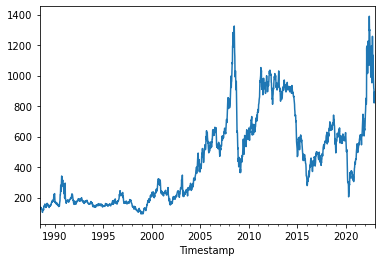

In [3]:
spot = df1["LGOc1"]
#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    1801.000000
mean      442.624864
std       291.804344
min        93.000000
25%       177.500000
50%       372.500000
75%       623.250000
max      1389.500000
Name: LGOc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.7545123641960797
Skewness logs: 0.03342705448965833
Kurtosis spot: 2.5384618643505568
Kurtosis logs: 1.6292715858833584
JB spot: Jarque_beraResult(statistic=186.86673832856613, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=141.33091286394205, pvalue=0.0)
Q(6) spot:         lb_stat  lb_pvalue
6  10488.653472        0.0
Q(6) logs:         lb_stat  lb_pvalue
6  10572.102846        0.0


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.262209596225549, 0.18444584579880546, 18, 1782, {'1%': -3.4340249409468155, '5%': -2.8631632820375903, '10%': -2.5676341842417187}, 16529.515414355315)
ADF logs: (-1.7035508751160686, 0.42928389410026113, 6, 1794, {'1%': -3.4340003240943844, '5%': -2.8631524150111547, '10%': -2.567628397867784}, -5679.547741430049)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.943
P-value                         0.312
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.613
P-value                         0.476
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The p

In [7]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  4.055
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  4.889
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


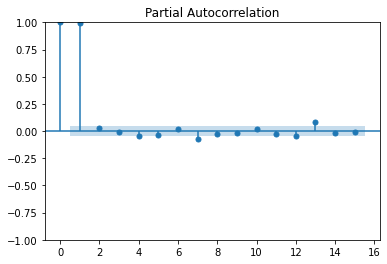

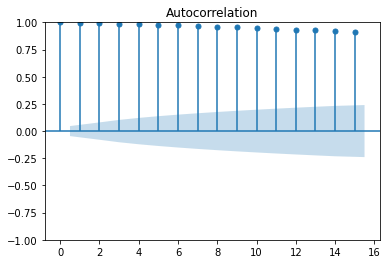

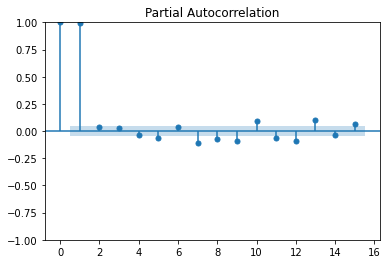

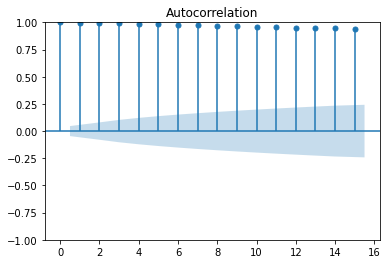

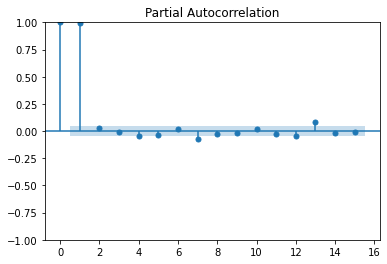

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

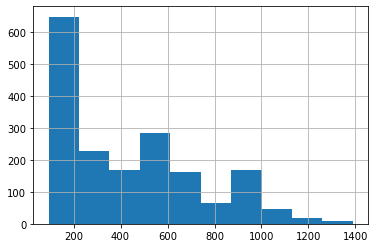

In [9]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

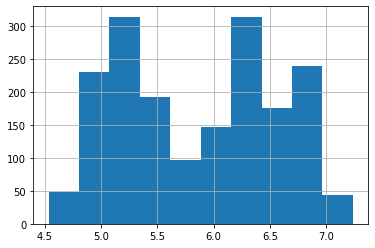

In [10]:
np.log(spot).hist()

In [11]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=1200)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10495.236, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10494.115, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10496.031, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10496.042, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10493.586, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10495.854, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.957 seconds


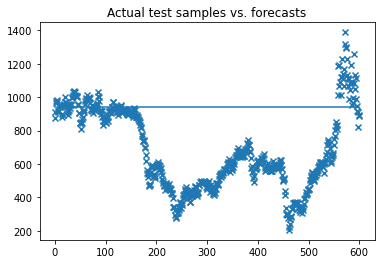

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5245.793
Date:                Tue, 27 Dec 2022   AIC                          10493.586
Time:                        18:48:13   BIC                          10498.675
Sample:                             0   HQIC                         10495.503
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       369.5947      6.818     54.205      0.000     356.231     382.959
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              3375.96
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               7.14   Skew:                            -1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

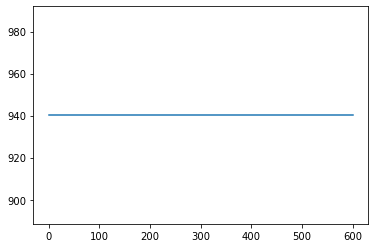

In [14]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [15]:
arima.predict(n_periods=test.shape[0])

array([940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
       940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25, 940.25,
      

<AxesSubplot:xlabel='Timestamp'>

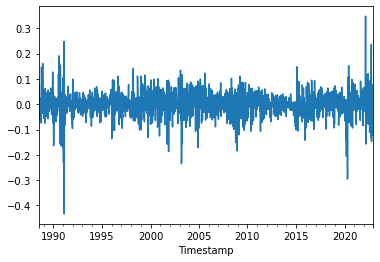

In [16]:
spot2 = np.log(spot).diff()
spot2.plot()

In [17]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    1800.000000
mean        0.001057
std         0.049048
min        -0.433394
25%        -0.022088
50%         0.003157
75%         0.027319
max         0.347638
Name: LGOc1, dtype: float64

In [18]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.5839790518684945
Kurtosis spot: 10.373443848328673
JB spot: Jarque_beraResult(statistic=4179.885023740564, pvalue=0.0)
Q(6) spot:      lb_stat  lb_pvalue
6  19.607997   0.003251


In [19]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-15.86713005123877, 9.070391583693168e-29, 5, 1794, {'1%': -3.4340003240943844, '5%': -2.8631524150111547, '10%': -2.567628397867784}, -5674.734337775983)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -44.105
P-value                         0.000
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.038
P-value                         0.941
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


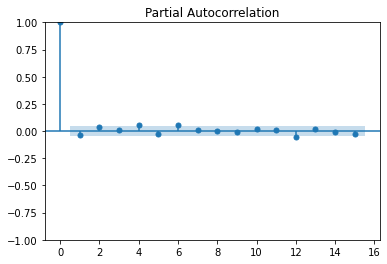

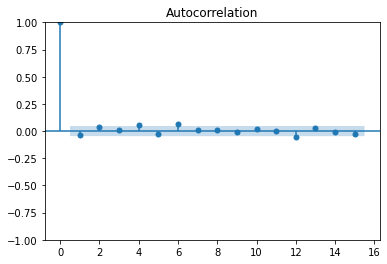

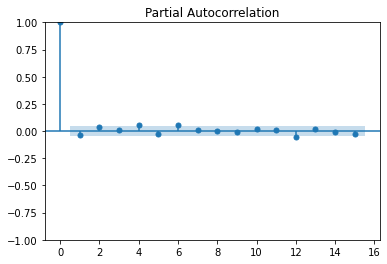

In [21]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

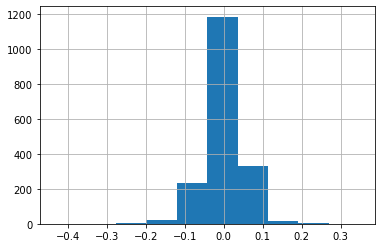

In [22]:
spot2.hist()


In [23]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=1200)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3799.693, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3796.651, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3803.423, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3802.667, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-3803.490, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-3802.341, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3803.967, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3802.891, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-3800.473, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3801.604, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-3792.659, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3802.909, Time=0.14 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.382 seconds


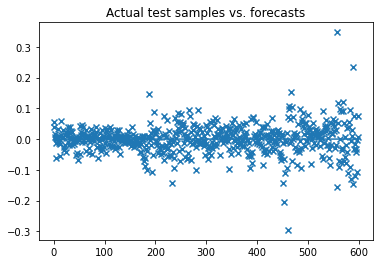

In [24]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [25]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(2, 0, 1)   Log Likelihood                1905.984
Date:                Tue, 27 Dec 2022   AIC                          -3803.967
Time:                        18:48:16   BIC                          -3783.607
Sample:                             0   HQIC                         -3796.298
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5585      0.223      2.504      0.012       0.121       0.996
ar.L2          0.0981      0.020      4.902      0.000       0.059       0.137
ma.L1         -0.6418      0.220     -2.916      0.004      -1.073      -0.210
sigma2         0.0024   5.42e-05     44.897      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2151.12
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.84
Prob(H) (two-sided):                  0.18   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

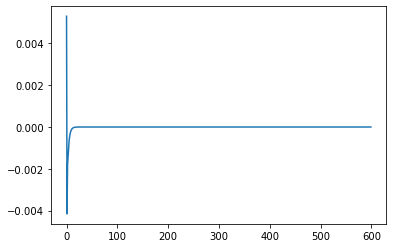

In [26]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [27]:
arima2.predict(n_periods=test2.shape[0])

array([ 5.29646627e-03, -4.15645935e-03, -1.80146389e-03, -1.41396585e-03,
       -9.66446257e-04, -6.78492749e-04, -4.73761353e-04, -3.31166310e-04,
       -2.31439662e-04, -1.61751563e-04, -1.13046041e-04, -7.90065316e-05,
       -5.52167043e-05, -3.85902860e-05, -2.69702832e-05, -1.88492041e-05,
       -1.31734804e-05, -9.20678581e-06, -6.43451104e-06, -4.49700180e-06,
       -3.14290006e-06, -2.19653477e-06, -1.53513154e-06, -1.07288483e-06,
       -7.49826206e-07, -5.24044450e-07, -3.66248316e-07, -2.55966510e-07,
       -1.78891892e-07, -1.25025376e-07, -8.73787202e-08, -6.10679288e-08,
       -4.26796354e-08, -2.98282800e-08, -2.08466235e-08, -1.45694525e-08,
       -1.01824138e-08, -7.11636565e-09, -4.97354172e-09, -3.47594804e-09,
       -2.42929797e-09, -1.69780691e-09, -1.18657668e-09, -8.29284063e-10,
       -5.79576583e-10, -4.05059051e-10, -2.83090863e-10, -1.97848774e-10,
       -1.38274110e-10, -9.66381003e-11, -6.75391973e-11, -4.72023266e-11,
       -3.29891341e-11, -

In [28]:
#cointegration tests

#normalized cv
#LR test

In [29]:
#correlaatiomatriisi

In [30]:
#np.argwhere(np.isnan(x))